# Top and bottom countries in Swedish media

In this notebook, we look at how the media coverage of the United States compares to the least covered countries in the world, in Swedish media.

- Sources: Datastory, Mynewsflash, Natural Earth Data
- Date: 2019-05-10

## Setup

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

%config InlineBackend.figure_format = 'retina'

plt.style.use('../assets/datastory.mpltstyle')

In [2]:
# Load snapshot of the news index data
df = pd.read_csv('../data/raw/2019-05-10-media-top-bottom.csv')

In [3]:
df.head()

,country,no_articles,iso_a3
0,Afghanistan,2192,AFG
1,Albanien,165,ALB
2,Algeriet,269,DZA
3,Andorra,49,AND
4,Angola,72,AGO


In [4]:
# Natural Earth Data shapefile
geo = gpd.read_file('../data/geo/ne_110m_admin_0_sovereignty/ne_110m_admin_0_sovereignty.shp')

# Reproject to Sphere Robinson
geo = geo.to_crs('+proj=robin +lon_0=0 +x_0=0 +y_0=0 +a=6371000 +b=6371000 +units=m no_defs')

# Remove some units
geo = geo[~geo['ADMIN'].isin(['Antarctica', 'Sweden'])]

In [5]:
geo.head(2)

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
0,Admin-0 sovereignty,1,6,Fiji,FJI,0,2,Sovereign country,Fiji,FJI,...,피지,Fiji,Fidżi,Fiji,Фиджи,Fiji,Fiji,Fiji,斐濟,(POLYGON ((16791320.44646314 -1716486.78038199...
1,Admin-0 sovereignty,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,United Republic of Tanzania,TZA,...,탄자니아,Tanzania,Tanzania,Tanzânia,Танзания,Tanzania,Tanzanya,Tanzania,坦桑尼亚,POLYGON ((3199333.602411759 -101490.6311645033...


## Calculate `n` countries comparable to USA

In [6]:
df = df.sort_values('no_articles')
df['cumsum'] = df.no_articles.cumsum()

# Is the cumulative sum below the sum for USA?
df['below_usa'] = df['cumsum'] < \
    df[df.iso_a3 == 'USA'].no_articles.iloc[0]

# Assign categorical values
df['cat'] = df.apply(lambda x: 'x' if x.below_usa \
                     else 'y' if x.iso_a3 == 'USA' \
                     else 'z', axis=1)

## Merge data

In [7]:
geo = geo.merge(df, left_on='ADM0_A3_IS', right_on='iso_a3', how='left')

# A few countries in the shapefile
# are missing in the country counts
geo['cat'] = geo.cat.fillna('z')

## Plot

In [8]:
# Custom cmap
cmap = LinearSegmentedColormap.from_list('dcmap', [
    (0, '#ff713f'),
    (.5, '#57d298'),
    (1, '#d6d6d7')])

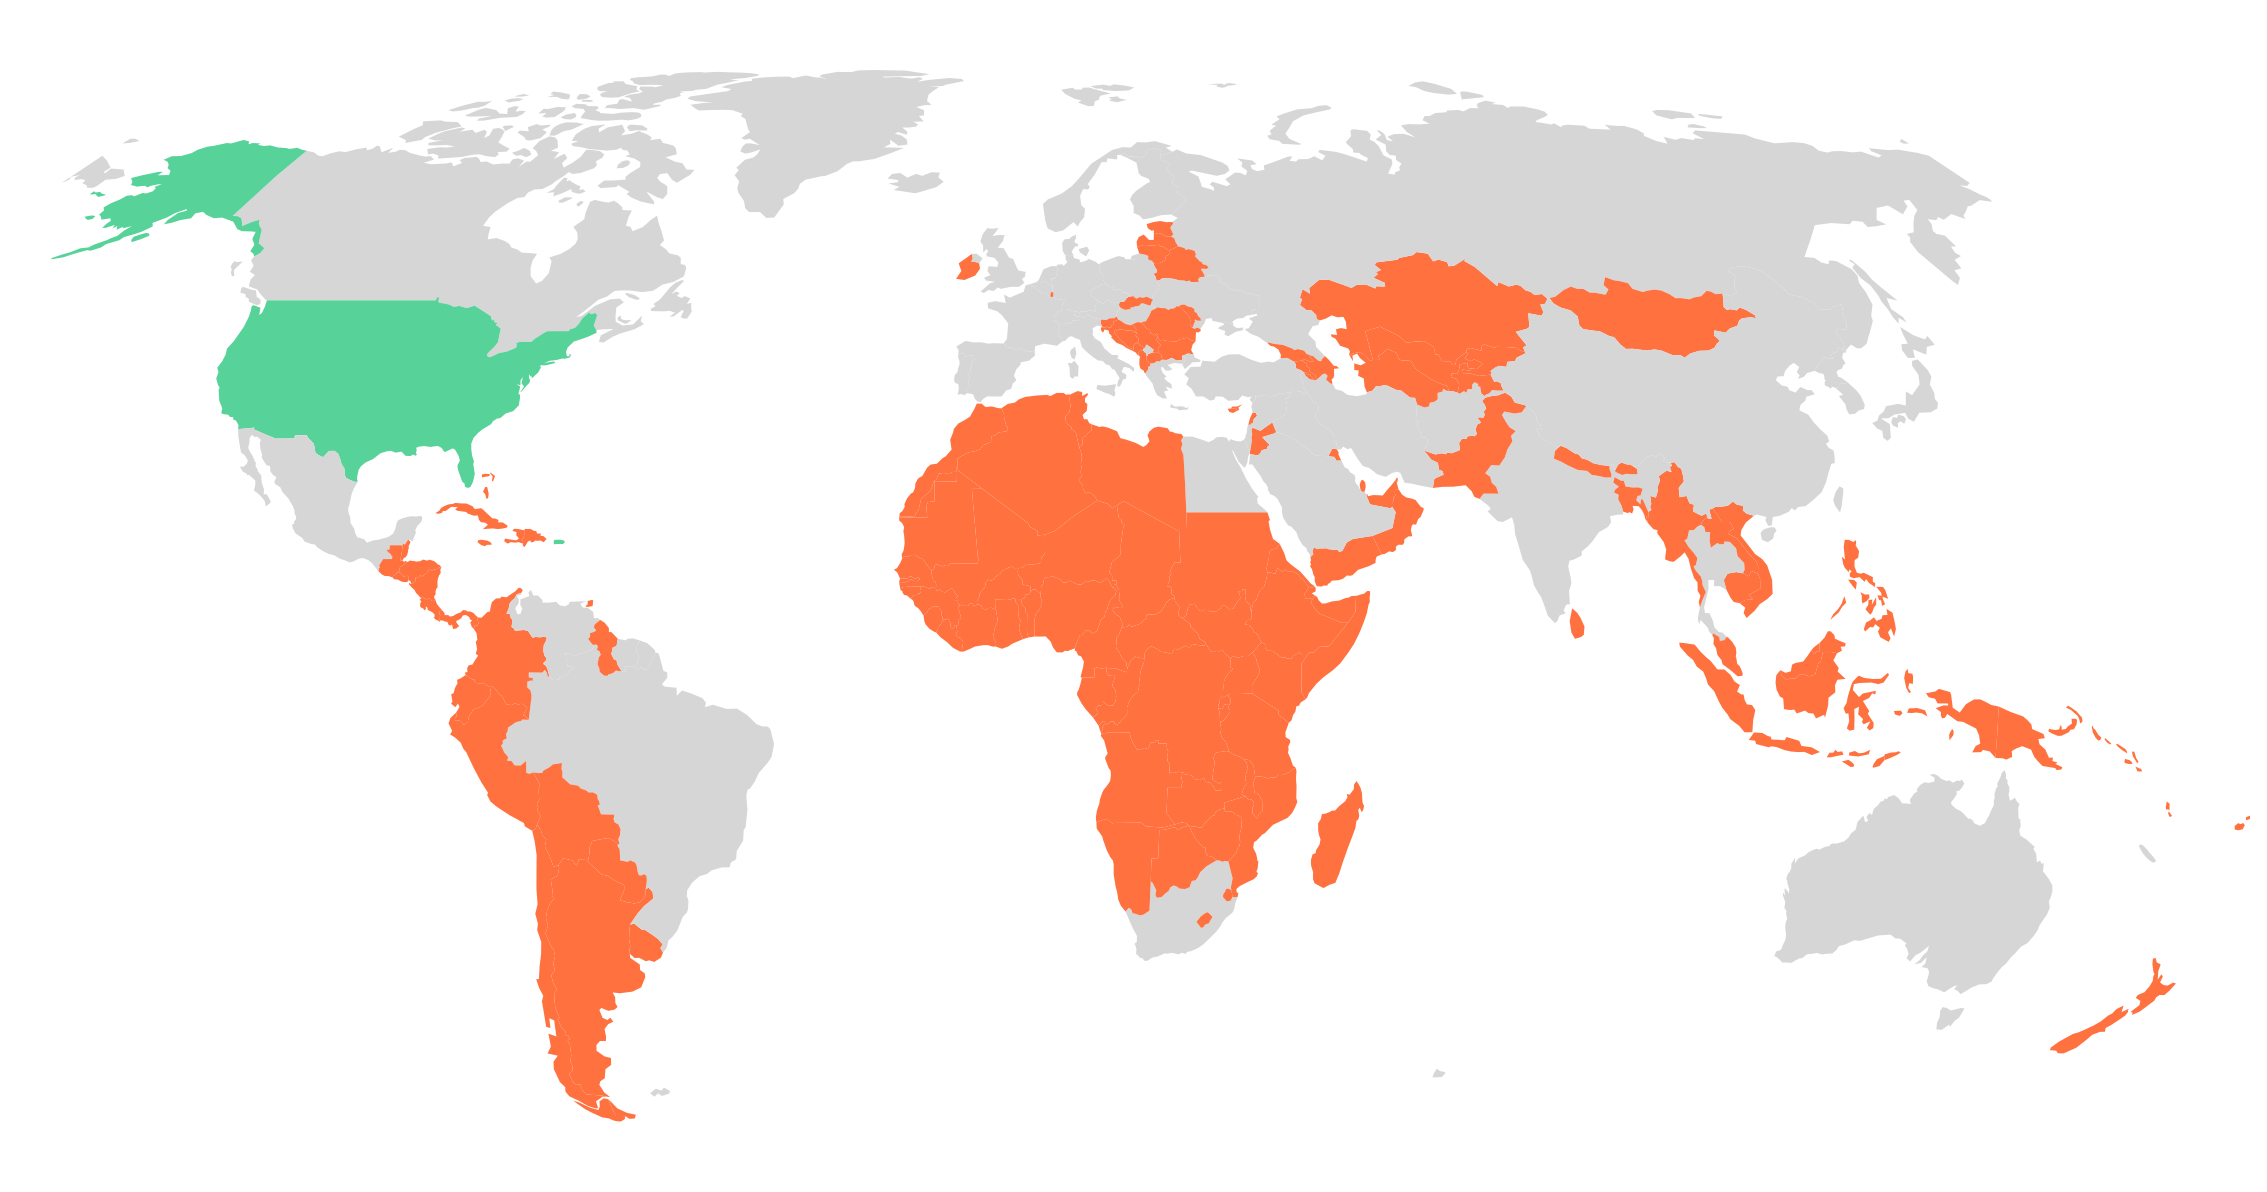

In [9]:
ax = geo.plot(column='cat', cmap=cmap, figsize=(20, 15));
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim(left=-1.35e7, right=1.67e7);

plt.gcf().savefig('../charts/2019-05-10-media-top-bottom.png')